In [1]:
import torch

inputs = torch.tensor(
    [[0.43, 0.15, 0.89], #your
     [0.55, 0.87, 0.66], #journey
     [0.57, 0.85, 0.64], #starts
     [0.22, 0.58, 0.33], #with
     [0.77, 0.25, 0.10], #one
     [0.05, 0.80, 0.55]] #step
)

In [2]:
# journey
input_query = inputs[1]
input_query

tensor([0.5500, 0.8700, 0.6600])

In [3]:
input_1 = inputs[0]
input_1

tensor([0.4300, 0.1500, 0.8900])

In [4]:
torch.dot(input_query, input_1)

tensor(0.9544)

In [5]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])

for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [6]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
attn_weights_2_tmp.sum()

tensor(1.0000)

In [7]:
def softmax(x):
    #not stable sometimes
    return torch.exp(x)/torch.exp(x).sum(dim=0)

softmax(attn_scores_2)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [8]:
torch.softmax(attn_scores_2, dim= 0)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

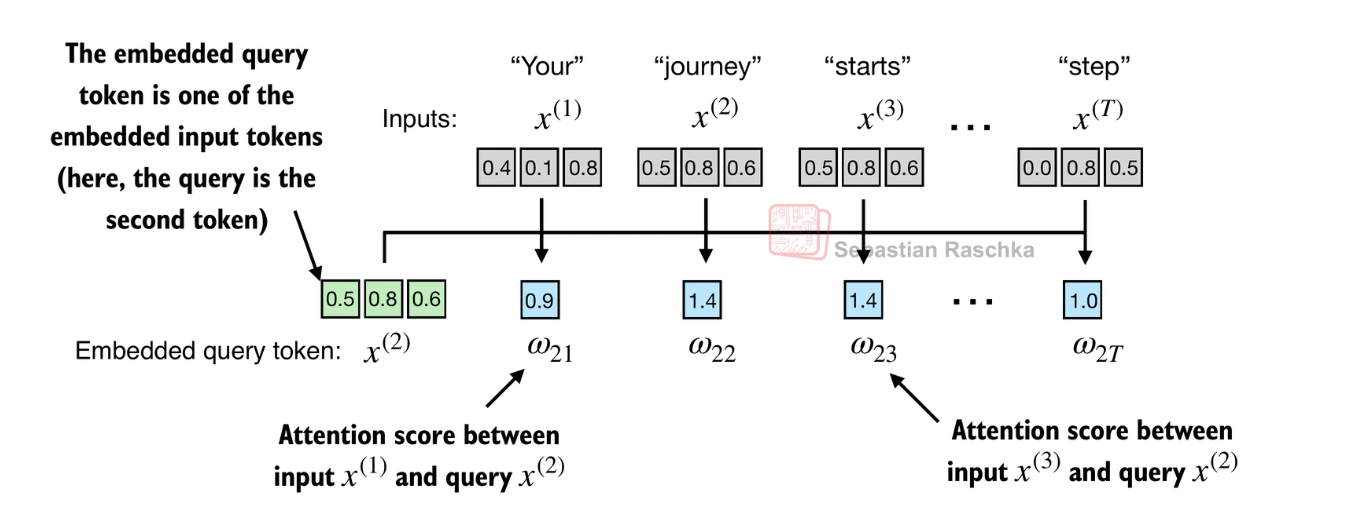

In [9]:
attn_weights_2 = torch.softmax(attn_scores_2, dim = 0)

In [10]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)


for i,x_i in enumerate(inputs):
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)    

tensor([0.4419, 0.6515, 0.5683])


In [11]:
attn_scores = torch.empty(6, 6)

for i, x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attn_scores[i, j] = torch.dot(x_i, x_j)


print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [12]:
attn_scores = inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [13]:
attn_weights = torch.softmax(attn_scores, dim = 1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

context_vector[i] =
    attn_weights[i,0] * inputs[0]
  + attn_weights[i,1] * inputs[1]
  + ...
  + attn_weights[i,5] * inputs[5]


In [14]:
all_context_vector = attn_weights @ inputs
all_context_vector

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

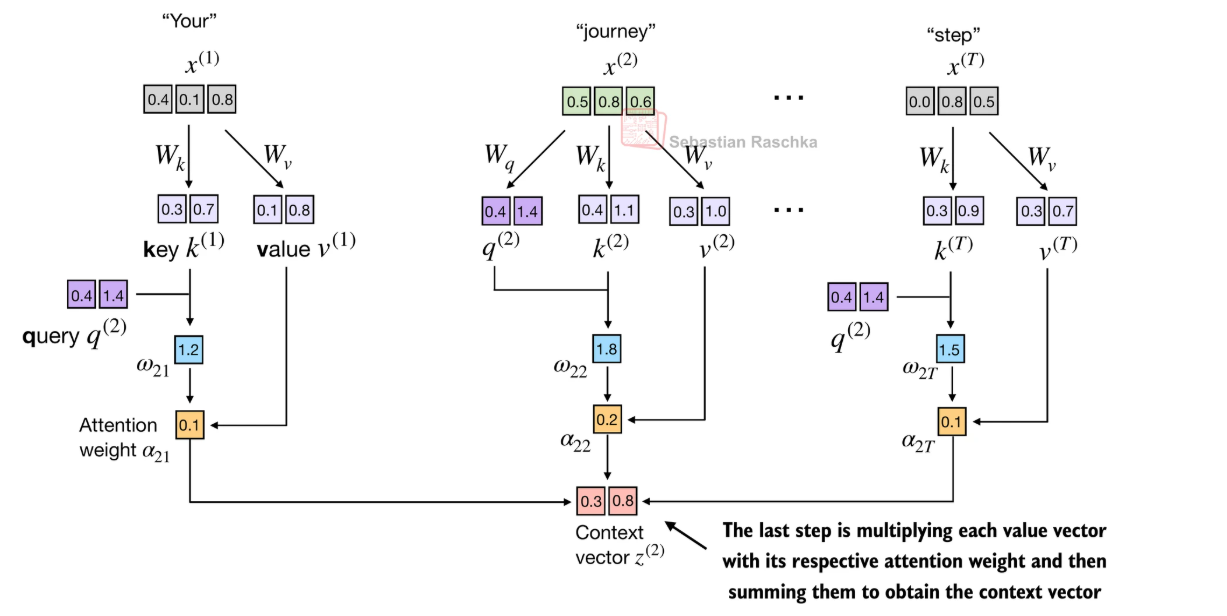

In [15]:
x_2 = inputs[1]
d_in = inputs.shape[1]
d_out = 2

In [16]:
torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(d_in, d_out))
w_key = torch.nn.Parameter(torch.rand(d_in, d_out))
w_value = torch.nn.Parameter(torch.rand(d_in, d_out))

In [17]:
query_2 = x_2 @ w_query
query_2

tensor([0.4306, 1.4551], grad_fn=<SqueezeBackward4>)

In [18]:
keys = inputs @ w_key
value = inputs @ w_value

keys.shape

torch.Size([6, 2])

In [19]:
keys

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]], grad_fn=<MmBackward0>)

In [20]:
keys_2 = keys[1]
attn_scores_ss = torch.dot(query_2, keys_2)

In [21]:
attn_scores_ss

tensor(1.8524, grad_fn=<DotBackward0>)

In [22]:
attn_scores_2 = query_2 @ keys.T
attn_scores_2 

tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
       grad_fn=<SqueezeBackward4>)

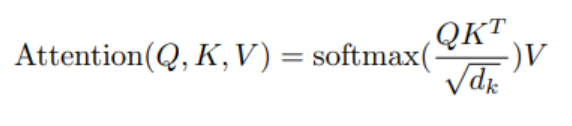

In [23]:
d_k = keys.shape[1]
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5, dim = -1)
attn_weights_2

tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
       grad_fn=<SoftmaxBackward0>)

In [24]:
context_vec_2 = attn_weights_2 @ value
context_vec_2

tensor([0.3061, 0.8210], grad_fn=<SqueezeBackward4>)

In [49]:
import torch.nn as nn

class SelfAttention_v1(nn.Module):

    def __init__(self, d_in, d_out, qkv_bias = False):
        super().__init__()
        self.w_query = torch.nn.Linear(d_in, d_out, bias = qkv_bias)
        self.w_key = torch.nn.Linear(d_in, d_out, bias = qkv_bias)
        self.w_value = torch.nn.Linear(d_in, d_out, bias = qkv_bias)
    
    def forward(self, x):
        queries = self.w_query(x)
        keys = self.w_key(x)
        value = self.w_value(x)
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=-1)

        context_vec = attn_weights @ value

        return context_vec
    


torch.manual_seed(789)

sa_v2 = SelfAttention_v1(d_in, d_out)
sa_v2(inputs)

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)

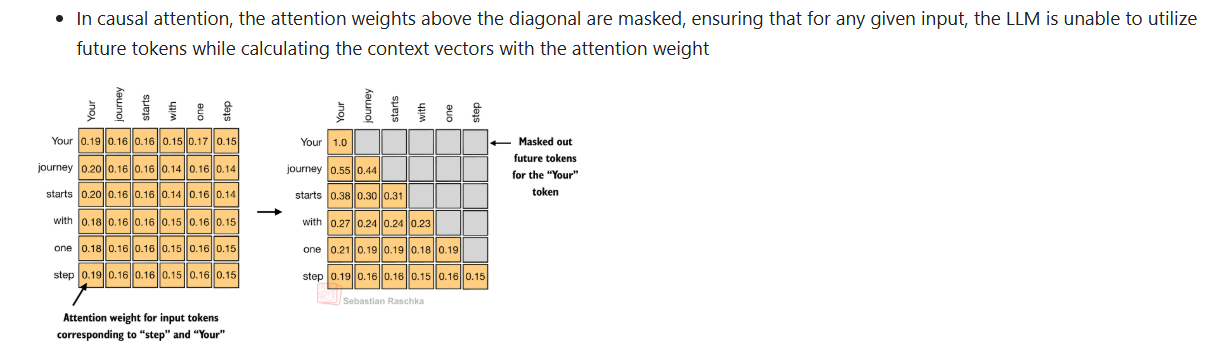

In [35]:
queries = sa_v2.w_query(inputs)
keys = sa_v2.w_key(inputs)
value = sa_v2.w_value(inputs)

attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / d_k**0.5, dim=-1)

In [36]:
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

In [37]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)


tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [39]:
masked_simple = attn_weights * mask_simple
masked_simple 

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)

In [40]:
rows_sum = masked_simple.sum(dim =-1, keepdim=True)
masked_simple_norm = masked_simple/rows_sum
masked_simple_norm

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)

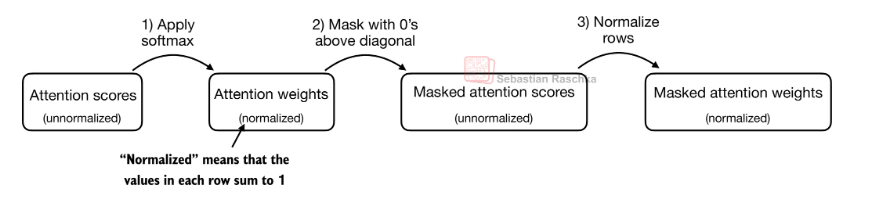

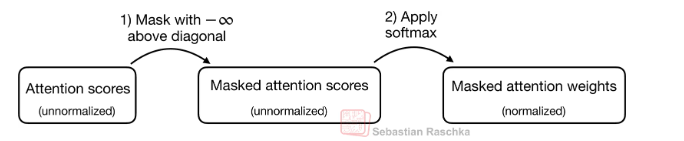

In [42]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [43]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=-1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


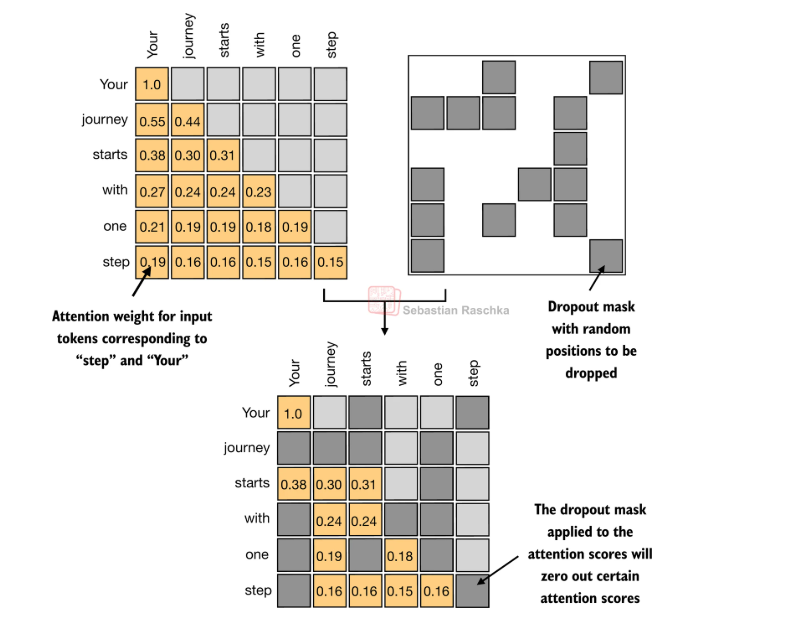

In [ ]:
torch.manual_seed(123)


layer = torch.nn.Dropout(0.5)

In [46]:
example = torch.ones(6,6)
example

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])

In [47]:
layer(example)

tensor([[2., 2., 0., 0., 2., 2.],
        [0., 0., 2., 0., 0., 2.],
        [0., 0., 2., 2., 0., 0.],
        [2., 2., 0., 2., 2., 2.],
        [0., 2., 2., 0., 0., 0.],
        [2., 2., 0., 0., 0., 0.]])

In [48]:
layer(attn_weights)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.1034, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.3331, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)

In [51]:
batch = torch.stack((inputs, inputs), dim = 0)
batch.shape

torch.Size([2, 6, 3])

In [ ]:
import torch.nn as nn

class CausalAttention(nn.Module):

    def __init__(self, d_in, d_out, context_length, dropout, qkv_bias = False):
        super().__init__()
        self.w_query = torch.nn.Linear(d_in, d_out, bias = qkv_bias)
        self.w_key = torch.nn.Linear(d_in, d_out, bias = qkv_bias)
        self.w_value = torch.nn.Linear(d_in, d_out, bias = qkv_bias)
        self.dropout = torch.nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))
    
    def forward(self, x):
        b, num_tokens, d_in = x.shape
        queries = self.w_query(x)
        keys = self.w_key(x) 
        values = self.w_value(x)
        
        attn_scores = queries @ keys.transpose(1, 2) # Changed transpose
        attn_scores.masked_fill_(  # New, _ ops are in-place
            self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)  # `:num_tokens` to account for cases where the number of tokens in the batch is smaller than the supported context_size
        attn_weights = torch.softmax(
            attn_scores / keys.shape[-1]**0.5, dim=-1
        )
        attn_weights = self.dropout(attn_weights) # New

        context_vec = attn_weights @ values
        return context_vec


torch.manual_seed(789)

sa_v2 = SelfAttention_v1(d_in, d_out)
sa_v2(inputs)



torch.manual_seed(123)

context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)

context_vecs = ca(batch)

print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]],

        [[-0.4519,  0.2216],
         [-0.5874,  0.0058],
         [-0.6300, -0.0632],
         [-0.5675, -0.0843],
         [-0.5526, -0.0981],
         [-0.5299, -0.1081]]], grad_fn=<UnsafeViewBackward0>)
context_vecs.shape: torch.Size([2, 6, 2])


In [53]:
batch

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])

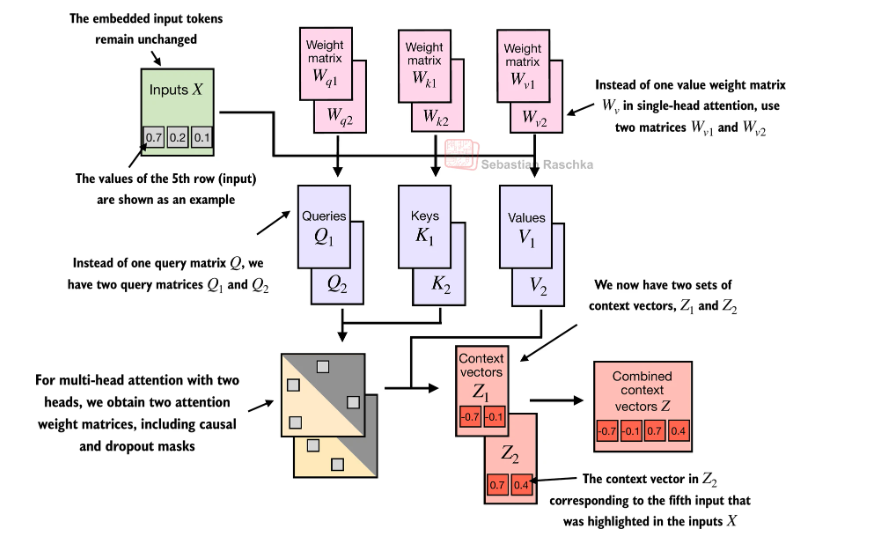

In [56]:
class MultiHeadAttentionWrapper(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads=2, qkv_bias = False):
        super().__init__()
        self.heads = nn.ModuleList([
            CausalAttention(d_in, d_out, context_length, dropout, qkv_bias) for _ in range(num_heads)
            ])
    
    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim = -1)
    

torch.manual_seed(123)

context_length = batch.shape[1]

d_in, d_out = 3, 2

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, dropout=0, num_heads=2)
mha(batch)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)